<a href="https://colab.research.google.com/github/halaaab/IT_326-Project-Group-1/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IT326 – Phase 2:Preprocessing Dataset: Breast Cancer Wisconsin (Diagnostic)–UCI Repository**

# Read DataSet

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression, Lasso
import seaborn as sns
import pickle
import jinja2

# Assuming the file is in the /tmp directory.
# If your file is in a different location, please update the path accordingly.
data = pd.read_csv('DataMiningSet.csv')

# Part 1 :Data Summarization



# **Attributes’ description table:**

In [56]:
import pandas as pd
from IPython.display import display

data = {
    "Attribute Name": [
        "id", "diagnosis",
        "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
        "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
        "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
        "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
        "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
        "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
    ],
    "Description": [
        "ID number", "Diagnosis (B = benign, M = malignant)",
        "Mean radius (mean of distances from center to points on perimeter)",
        "Mean texture (standard deviation of gray-scale values)",
        "Mean perimeter length",
        "Mean area of the cell nuclei",
        "Mean smoothness (local variation in radius lengths)",
        "Mean compactness (perimeter^2 / area - 1.0)",
        "Mean concavity (severity of concave portions of the contour)",
        "Mean concave points (number of concave portions of the contour)",
        "Mean symmetry",
        "Mean fractal dimension (‘coastline approximation’ - 1)",
        "Standard error of radius",
        "Standard error of texture",
        "Standard error of perimeter",
        "Standard error of area",
        "Standard error of smoothness",
        "Standard error of compactness",
        "Standard error of concavity",
        "Standard error of concave points",
        "Standard error of symmetry",
        "Standard error of fractal dimension",
        "Worst (largest) value of radius",
        "Worst value of texture",
        "Worst value of perimeter",
        "Worst value of area",
        "Worst value of smoothness",
        "Worst value of compactness",
        "Worst value of concavity",
        "Worst value of concave points",
        "Worst value of symmetry",
        "Worst value of fractal dimension"
    ],
    "Data Type": [
        "Numeric", "Categorical (Binary: B/M)",
        *["Numeric"] * 30
    ],
    "Possible Values": [
        "Unique integer IDs",
        "B = benign, M = malignant",
        "Ranges vary (e.g., radius_mean ≈ 6–28)",
        "≈ 9–40",
        "≈ 43–188",
        "≈ 143–2501",
        "≈ 0.05–0.16",
        "≈ 0.02–0.35",
        "≈ 0–0.43",
        "≈ 0–0.20",
        "≈ 0.1–0.3",
        "≈ 0.05–0.1",
        "≈ 0.1–2.9",
        "≈ 0.3–4.9",
        "≈ 0.8–22",
        "≈ 6.8–542",
        "≈ 0.001–0.03",
        "≈ 0.002–0.14",
        "≈ 0–0.40",
        "≈ 0–0.05",
        "≈ 0.01–0.08",
        "≈ 0.001–0.03",
        "≈ 7.9–36",
        "≈ 12–50",
        "≈ 50–251",
        "≈ 185–4254",
        "≈ 0.07–0.22",
        "≈ 0.03–1.06",
        "≈ 0.02–1.25",
        "≈ 0.02–0.29",
        "≈ 0.16–0.66",
        "≈ 0.06–0.21"
    ]
}

attributes_df = pd.DataFrame(data)
display(attributes_df)


,Attribute Name,Description,Data Type,Possible Values
0,id,ID number,Numeric,Unique integer IDs
1,diagnosis,"Diagnosis (B = benign, M = malignant)",Categorical (Binary: B/M),"B = benign, M = malignant"
2,radius_mean,Mean radius (mean of distances from center to ...,Numeric,"Ranges vary (e.g., radius_mean ≈ 6–28)"
3,texture_mean,Mean texture (standard deviation of gray-scale...,Numeric,≈ 9–40
4,perimeter_mean,Mean perimeter length,Numeric,≈ 43–188
5,area_mean,Mean area of the cell nuclei,Numeric,≈ 143–2501
6,smoothness_mean,Mean smoothness (local variation in radius len...,Numeric,≈ 0.05–0.16
7,compactness_mean,Mean compactness (perimeter^2 / area - 1.0),Numeric,≈ 0.02–0.35
8,concavity_mean,Mean concavity (severity of concave portions o...,Numeric,≈ 0–0.43
9,concave_points_mean,Mean concave points (number of concave portion...,Numeric,≈ 0–0.20


# **S:ample of 20 people from the dataset:**

In [61]:
sample=data.sample(n=20);
sample

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.000000,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
366,9011494,M,20.200,26.83,133.70,1234.0,0.09905,0.16690,0.16410,0.126500,...,24.190,33.81,160.00,1671.0,0.12780,0.34160,0.37030,0.21520,0.3271,0.07632
286,8912909,B,11.940,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.037910,...,13.240,27.29,92.20,546.1,0.11160,0.28130,0.23650,0.11550,0.2465,0.09981
217,8811779,B,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.010710,...,11.480,24.47,75.40,403.7,0.09527,0.13970,0.19250,0.03571,0.2868,0.07809
396,90401601,B,13.510,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.053810,...,14.800,27.20,97.33,675.2,0.14280,0.25700,0.34380,0.14530,0.2666,0.07686
175,872113,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.00000,0.000000,...,9.262,17.04,58.36,259.2,0.11620,0.07057,0.00000,0.00000,0.2592,0.07848
403,9047,B,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,...,13.860,23.02,89.69,580.9,0.11720,0.19580,0.18100,0.08388,0.3297,0.07834
382,90250,B,12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.029780,...,12.570,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349
207,879830,M,17.010,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.053900,...,19.800,25.05,130.00,1210.0,0.11110,0.14860,0.19320,0.10960,0.3275,0.06469


This code block takes a random sample of 20 rows from the breast cancer dataset and displays them. It’s mainly used to preview the structure of the data and check how the attributes look for real patients, including their ID, diagnosis (benign/malignant), and all feature values. This quick inspection helps verify that the dataset was loaded correctly and gives an initial feel for the ranges of different attributes before preprocessing.

# Five Number Summary

In [64]:
import pandas as pd

import pandas as pd

data = pd.read_csv("DataMiningSet.csv")

numeric_cols = data.select_dtypes(include=['number'])

five_num_summary = numeric_cols.describe(percentiles=[.25, .5, .75]).T[['min','25%','50%','75%','max']]

print("Five Number Summary:")
display(five_num_summary)

Five Number Summary:


,min,25%,50%,75%,max
id,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Five-Number Summary Analysis

The five-number summary shows that tumor size features such as Radius (Mean), Perimeter (Mean), and Area (Mean) have wide ranges and large variability, indicating significant differences in tumor sizes among patients. In contrast, features like Smoothness (Mean), Symmetry (Mean), and Fractal Dimension (Mean) show small ranges and low variation, meaning these characteristics are more consistent across samples. Overall, size-related attributes are highly variable, while texture and shape features remain relatively stable.

# **Summary of data**

In [66]:
import pandas as pd



data = pd.read_csv("DataMiningSet.csv", header=None, names=headers)

print("Summary of data:\n")
summary = data.describe()
print(summary)

Summary of data:

           ID Diagnosis Radius_Mean Texture_Mean Perimeter_Mean Area_Mean  \
count     570       570         570          570            570       570   
unique    570         3         457          480            523       540   
top     92751         B       12.34        16.84          134.7     512.2   
freq        1       357           4            3              3         3   

       Smoothness_Mean Compactness_Mean Concavity_Mean Concave_Points_Mean  \
count              570              570            570                 570   
unique             475              538            538                 543   
top             0.1007           0.1147              0                   0   
freq                 5                3             13                  13   

        ... Radius_Worst Texture_Worst Perimeter_Worst Area_Worst  \
count   ...          570           570             570        570   
unique  ...          458           512             515        545  

# **Statistical summary of numeric attributes:**

***Radius (mean):*** The radius values range from 6.98 to 28.11, with an average of 14.12. The median (13.37) is close to the mean, suggesting a relatively balanced distribution. The standard deviation of 3.52 indicates moderate variability, showing that tumor sizes differ across patients.

**Texture (mean):** Texture values vary between 9.71 and 39.28, with a mean of 19.29. The median is 18.84, which is very close to the mean, suggesting a fairly symmetric distribution. The standard deviation of 4.30 shows some variability in the texture of tumors.
**Perimeter (mean):** The perimeter ranges from 43.79 to 188.5, with an average of 91.97. The median (86.24) is slightly lower than the mean, suggesting a slight right-skew in distribution. The standard deviation of 24.29 indicates high variability in perimeter size among different tumors.

**Area (mean):** Tumor area values range widely, from 143.5 to 2501, with a mean of 654.9. The median (551.1) is lower than the mean, again indicating a right-skewed distribution. The standard deviation of 351.9 highlights significant variability, reflecting that tumors differ greatly in size.

**Smoothness (mean):** The smoothness values range from 0.05 to 0.16, with a mean of 0.096. The median (0.095) is close to the mean, suggesting a balanced distribution. The standard deviation of 0.01 indicates low variability, meaning smoothness is relatively consistent across tumors.

**Compactness (mean):** Compactness values vary between 0.02 and 0.35, with an average of 0.10. The median (0.09) is slightly lower than the mean, showing mild skewness. The standard deviation of 0.05 indicates noticeable variability in compactness.

**Concavity (mean):** Concavity ranges from 0.00 to 0.43, with a mean of 0.08. The median is 0.06, lower than the mean, indicating a right-skewed distribution where some tumors have much higher concavity. The standard deviation of 0.08 suggests variability in tumor shape concavity.

**Symmetry (mean):** Symmetry values range from 0.11 to 0.30, with an average of 0.18. The median (0.18) is nearly equal to the mean, suggesting a fairly symmetric distribution. The standard deviation of 0.03 shows limited variability across patients.

**Fractal Dimension (mean):** The fractal dimension ranges between 0.05 and 0.10, with a mean of 0.06. The median is also 0.06, close to the mean, indicating symmetry in distribution. The low standard deviation of 0.007 shows that this feature is quite consistent across tumors.


# Mean & Standard Deviation

In [68]:
import pandas as pd


data = pd.read_csv("DataMiningSet.csv")

numeric_cols = data.select_dtypes(include='number').columns
if 'ID' in numeric_cols:
    numeric_cols = numeric_cols.drop('ID')

mean_std_summary = data[numeric_cols].agg(['mean', 'std']).T

print("Mean and Standard Deviation for numeric attributes:")
display(mean_std_summary)

Mean and Standard Deviation for numeric attributes:


,mean,std
id,3.037183e+07,1.250206e+08
radius_mean,1.412729e+01,3.524049e+00
texture_mean,1.928965e+01,4.301036e+00
perimeter_mean,9.196903e+01,2.429898e+01
area_mean,6.548891e+02,3.519141e+02
smoothness_mean,9.636028e-02,1.406413e-02
compactness_mean,1.043410e-01,5.281276e-02
concavity_mean,8.879932e-02,7.971981e-02
concave_points_mean,4.891915e-02,3.880284e-02
symmetry_mean,1.811619e-01,2.741428e-02


We calculated the mean to understand the central tendency of the features, and the standard deviation to measure how much the data varies around the mean. In addition, the variance was computed as another measure of spread. These metrics helped us understand which features are more consistent across patients and which show higher variability.


# **Calculate the variance**

In [69]:
import pandas as pd



data = pd.read_csv("DataMiningSet.csv")
variance = data.drop(columns=["ID","Diagnosis"], errors="ignore").var(numeric_only=True)
print("Calculate the Variance:\n")
print(variance)

Calculate the Variance:

id                         1.563015e+16
radius_mean                1.241892e+01
texture_mean               1.849891e+01
perimeter_mean             5.904405e+02
area_mean                  1.238436e+05
smoothness_mean            1.977997e-04
compactness_mean           2.789187e-03
concavity_mean             6.355248e-03
concave_points_mean        1.505661e-03
symmetry_mean              7.515428e-04
fractal_dimension_mean     4.984872e-05
radius_se                  7.690235e-02
texture_se                 3.043159e-01
perimeter_se               4.087896e+00
area_se                    2.069432e+03
smoothness_se              9.015114e-06
compactness_se             3.207029e-04
concavity_se               9.111982e-04
concave_points_se          3.807242e-05
symmetry_se                6.833290e-05
fractal_dimension_se       7.001692e-06
radius_worst               2.336022e+01
texture_worst              3.777648e+01
perimeter_worst            1.129131e+03
area_worst     

Variance Analysis of the Dataset:
**High Variance Values:**

**Area (mean) (123,803.58):** Extremely high variance, showing that tumor sizes differ greatly between patients.

**Perimeter (mean) (588.29):** High variance, suggesting large differences in tumor perimeter measurements.

**Radius (mean) (11.89):** Indicates significant variability in tumor radius values.

**Texture (mean) (18.89): **Shows a wide range of texture values, reflecting differences in pixel intensity variation.

**Moderate Variance Values:**
**Compactness (mean) (0.04):** Displays moderate variability, indicating that compactness differs but not as widely as size-related attributes.

**Concavity (mean) (0.06)**: Suggests some variability in tumor shape concavity, though less than area or perimeter.

**Symmetry (mean) (0.003):** Moderate variance, showing that most tumors have relatively similar symmetry values.

**Low Variance Values:**
**Fractal Dimension (mean) (0.00005):** Very low variance, suggesting that this attribute is fairly consistent across patients.

**Smoothness (mean) (0.0002): **Low variance, meaning smoothness is nearly uniform among tumors.

# **Understanding the data through graph representations:**

# **Histogram**

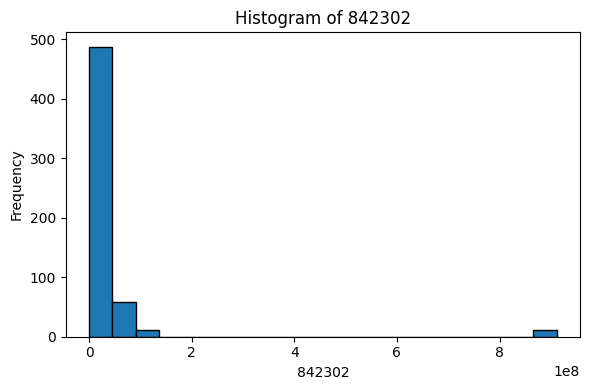

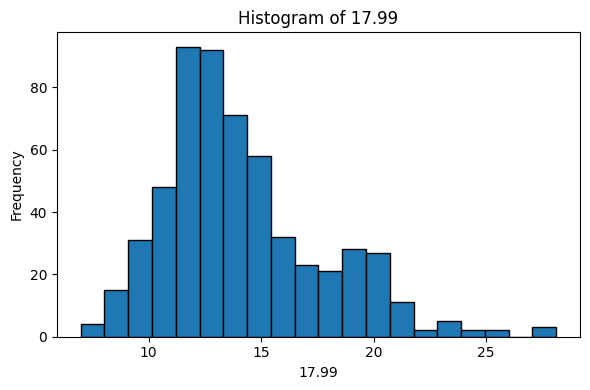

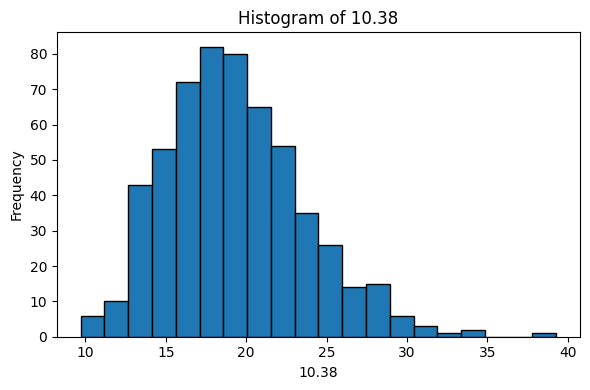

In [ ]:

numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols[:3]:
    plt.figure(figsize=(6,4))
    plt.hist(data[col], bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Histogram This plot shows the distribution of numeric attributes in the dataset. It helps visualize how values are spread and whether they are concentrated in specific ranges or evenly distributed. From the histograms, we can also detect skewness or outliers, which is useful for deciding if normalization or outlier removal is needed during the preprocessing phase.

# Box Plot

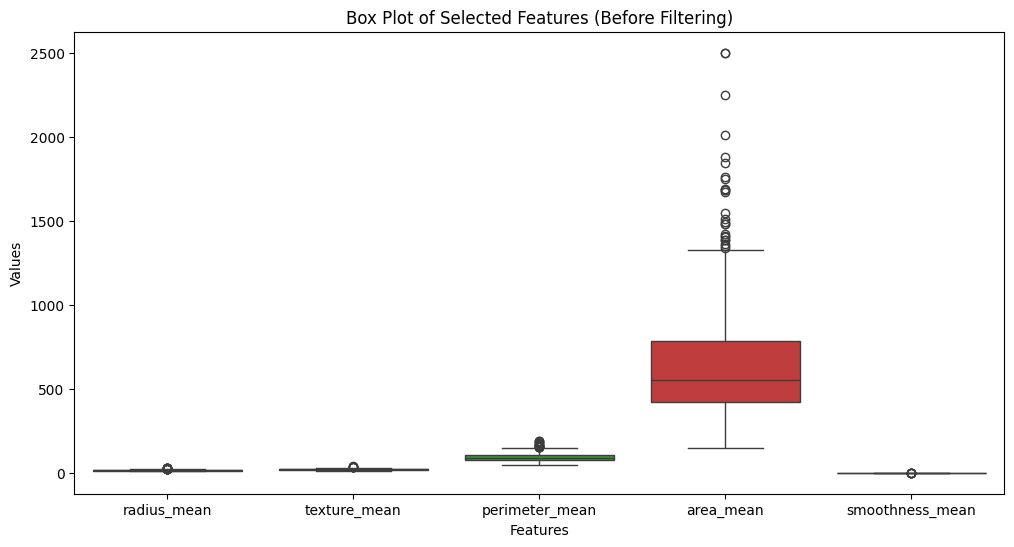

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("DataMiningSet.csv")
columns_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

plt.figure(figsize=(12,6))
sns.boxplot(data=data[columns_to_plot])
plt.title('Box Plot of Selected Features (Before Filtering)')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

This box plot shows the distribution of selected numeric features before preprocessing. It highlights the spread of the data and detects outliers. We can observe that some features, especially area_mean, contain many outliers, indicating the need for preprocessing steps such as outlier removal or normalization to improve data quality.
This box plot shows the distribution of selected numeric features before preprocessing. It highlights the spread of the data and detects outliers. We can observe that some features, especially area_mean, contain many outliers, indicating the need for preprocessing steps such as outlier removal or normalization to improve data quality.
This box plot shows the distribution of selected numeric features before preprocessing. It highlights the spread of the data and detects outliers. We can observe that some features, especially area_mean, contain many outliers, indicating the need for preprocessing steps such as outlier removal or normalization to improve data quality.


# **Scatter Plot**

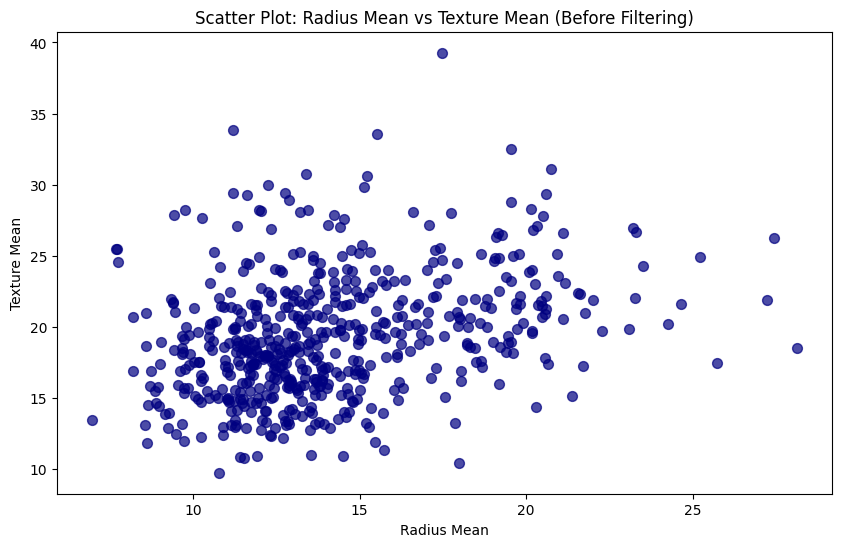

In [32]:
import matplotlib.pyplot as plt

x = data['radius_mean']
y = data['texture_mean']

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='#000080', marker='o', s=50, alpha=0.7)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Scatter Plot: Radius Mean vs Texture Mean (Before Filtering)')
plt.show()

This plot shows the relationship between two numerical attributes — radius_mean and texture_mean. Each point represents one record from the dataset, allowing us to visually inspect how these two features correlate. From the scatter plot, we can observe whether there is a positive or negative trend, clusters, or unusual points. This visualization helps identify relationships between variables and possible outliers that may need to be handled during preprocessing.



# Class Label Distribution (Diagnosis)

Index(['842302', 'M', '17.99', '10.38', '122.8'], dtype='object')
M
B    0.628521
M    0.371479
Name: count, dtype: float64


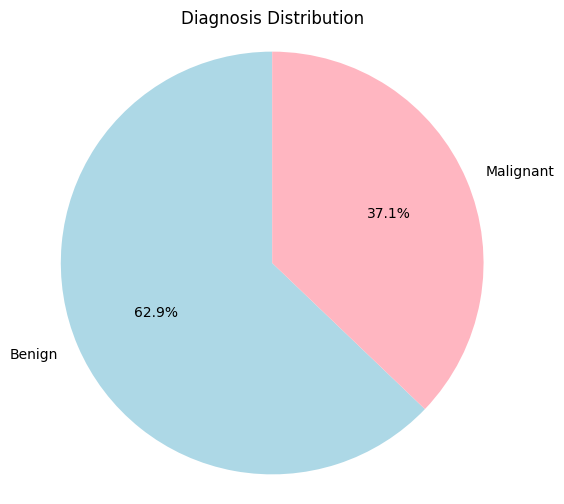

In [ ]:
print(data.columns[:5])
vc = data.iloc[:, 1].value_counts()
print(vc / vc.sum())

label_map = {'B': 'Benign', 'M': 'Malignant'}
names  = [label_map.get(x, str(x)) for x in vc.index.tolist()]
values = vc.values.tolist()

fig = plt.figure(figsize=(6,6))
plt.pie(values, labels=names, autopct='%1.1f%%',
        colors=['#ADD8E6','#FFB6C1'], startangle=90)
plt.title('Diagnosis Distribution')
plt.axis('equal')
plt.show()

This pie chart shows the distribution of the target class Diagnosis in the dataset. The data is slightly imbalanced, with 62.9% benign cases (B) and 37.1% malignant cases (M). This helps us understand the class balance before applying any machine learning models.

# Part 2

# **Data Preprocessing:**

# **Show Duplicate:**

In [ ]:
duplicates = data[data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
duplicates

Number of duplicate rows: 0


,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


we checked for duplicate records in the dataset to ensure data quality. The result showed that there were no duplicate rows, which means the dataset is clean and does not require duplicate removal.

# **Show missing data:**

In [ ]:
missing_counts = data.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()

rows_with_missing = data.isnull().sum(axis=1)
print("Number of rows with missing values:", (rows_with_missing > 0).sum())
print("Example rows with missing values:")
print(data[rows_with_missing > 0].head())

Missing values in each column:
842302      0
M           0
17.99       0
10.38       0
122.8       0
1001        0
0.1184      0
0.2776      0
0.3001      0
0.1471      0
0.2419      0
0.07871     0
1.095       0
0.9053      0
8.589       0
153.4       0
0.006399    0
0.04904     0
0.05373     0
0.01587     0
0.03003     0
0.006193    0
25.38       0
17.33       0
184.6       0
2019        0
0.1622      0
0.6656      0
0.7119      0
0.2654      0
0.4601      0
0.1189      0
dtype: int64

Number of rows with missing values: 0
Example rows with missing values:
Empty DataFrame
Columns: [842302, M, 17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]
Index: []

[0 rows x 32 columns]


As part of the preprocessing stage, we analyzed the dataset for missing values. Using the isnull().sum() function, we calculated the number of missing values in each column, and with row-wise checks, we verified whether any rows contained incomplete data. The results indicated that there are no missing values in any column or row (0 values missing). Therefore, no imputation or deletion of data was required, and the dataset can be considered complete and reliable for further analysis.

# **Show Outliers:**

In [ ]:
from scipy.stats import zscore
import numpy as np

numeric_cols = data.select_dtypes(include=[np.number]).columns
z_scores = data[numeric_cols].apply(zscore)
threshold = 3
outliers = data[(np.abs(z_scores) > threshold).any(axis=1)]

print("Number of outlier rows detected:", outliers.shape[0])
outliers.head()

Number of outlier rows detected: 82


,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
8,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750
11,846226,M,19.17,24.80,132.40,1123.0,0.09740,0.2458,0.2065,0.11180,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
13,84667401,M,13.73,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,...,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
22,851509,M,21.16,23.04,137.20,1404.0,0.09428,0.1022,0.1097,0.08632,...,29.17,35.59,188.00,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526


This code identifies outliers in the dataset using the Z-score method.
It calculates how far each data point is from the mean and filters out rows where any value exceeds the threshold.
The result shows the number of detected outlier rows and displays a few examples for review.

# **Box Plot For Outilers :**

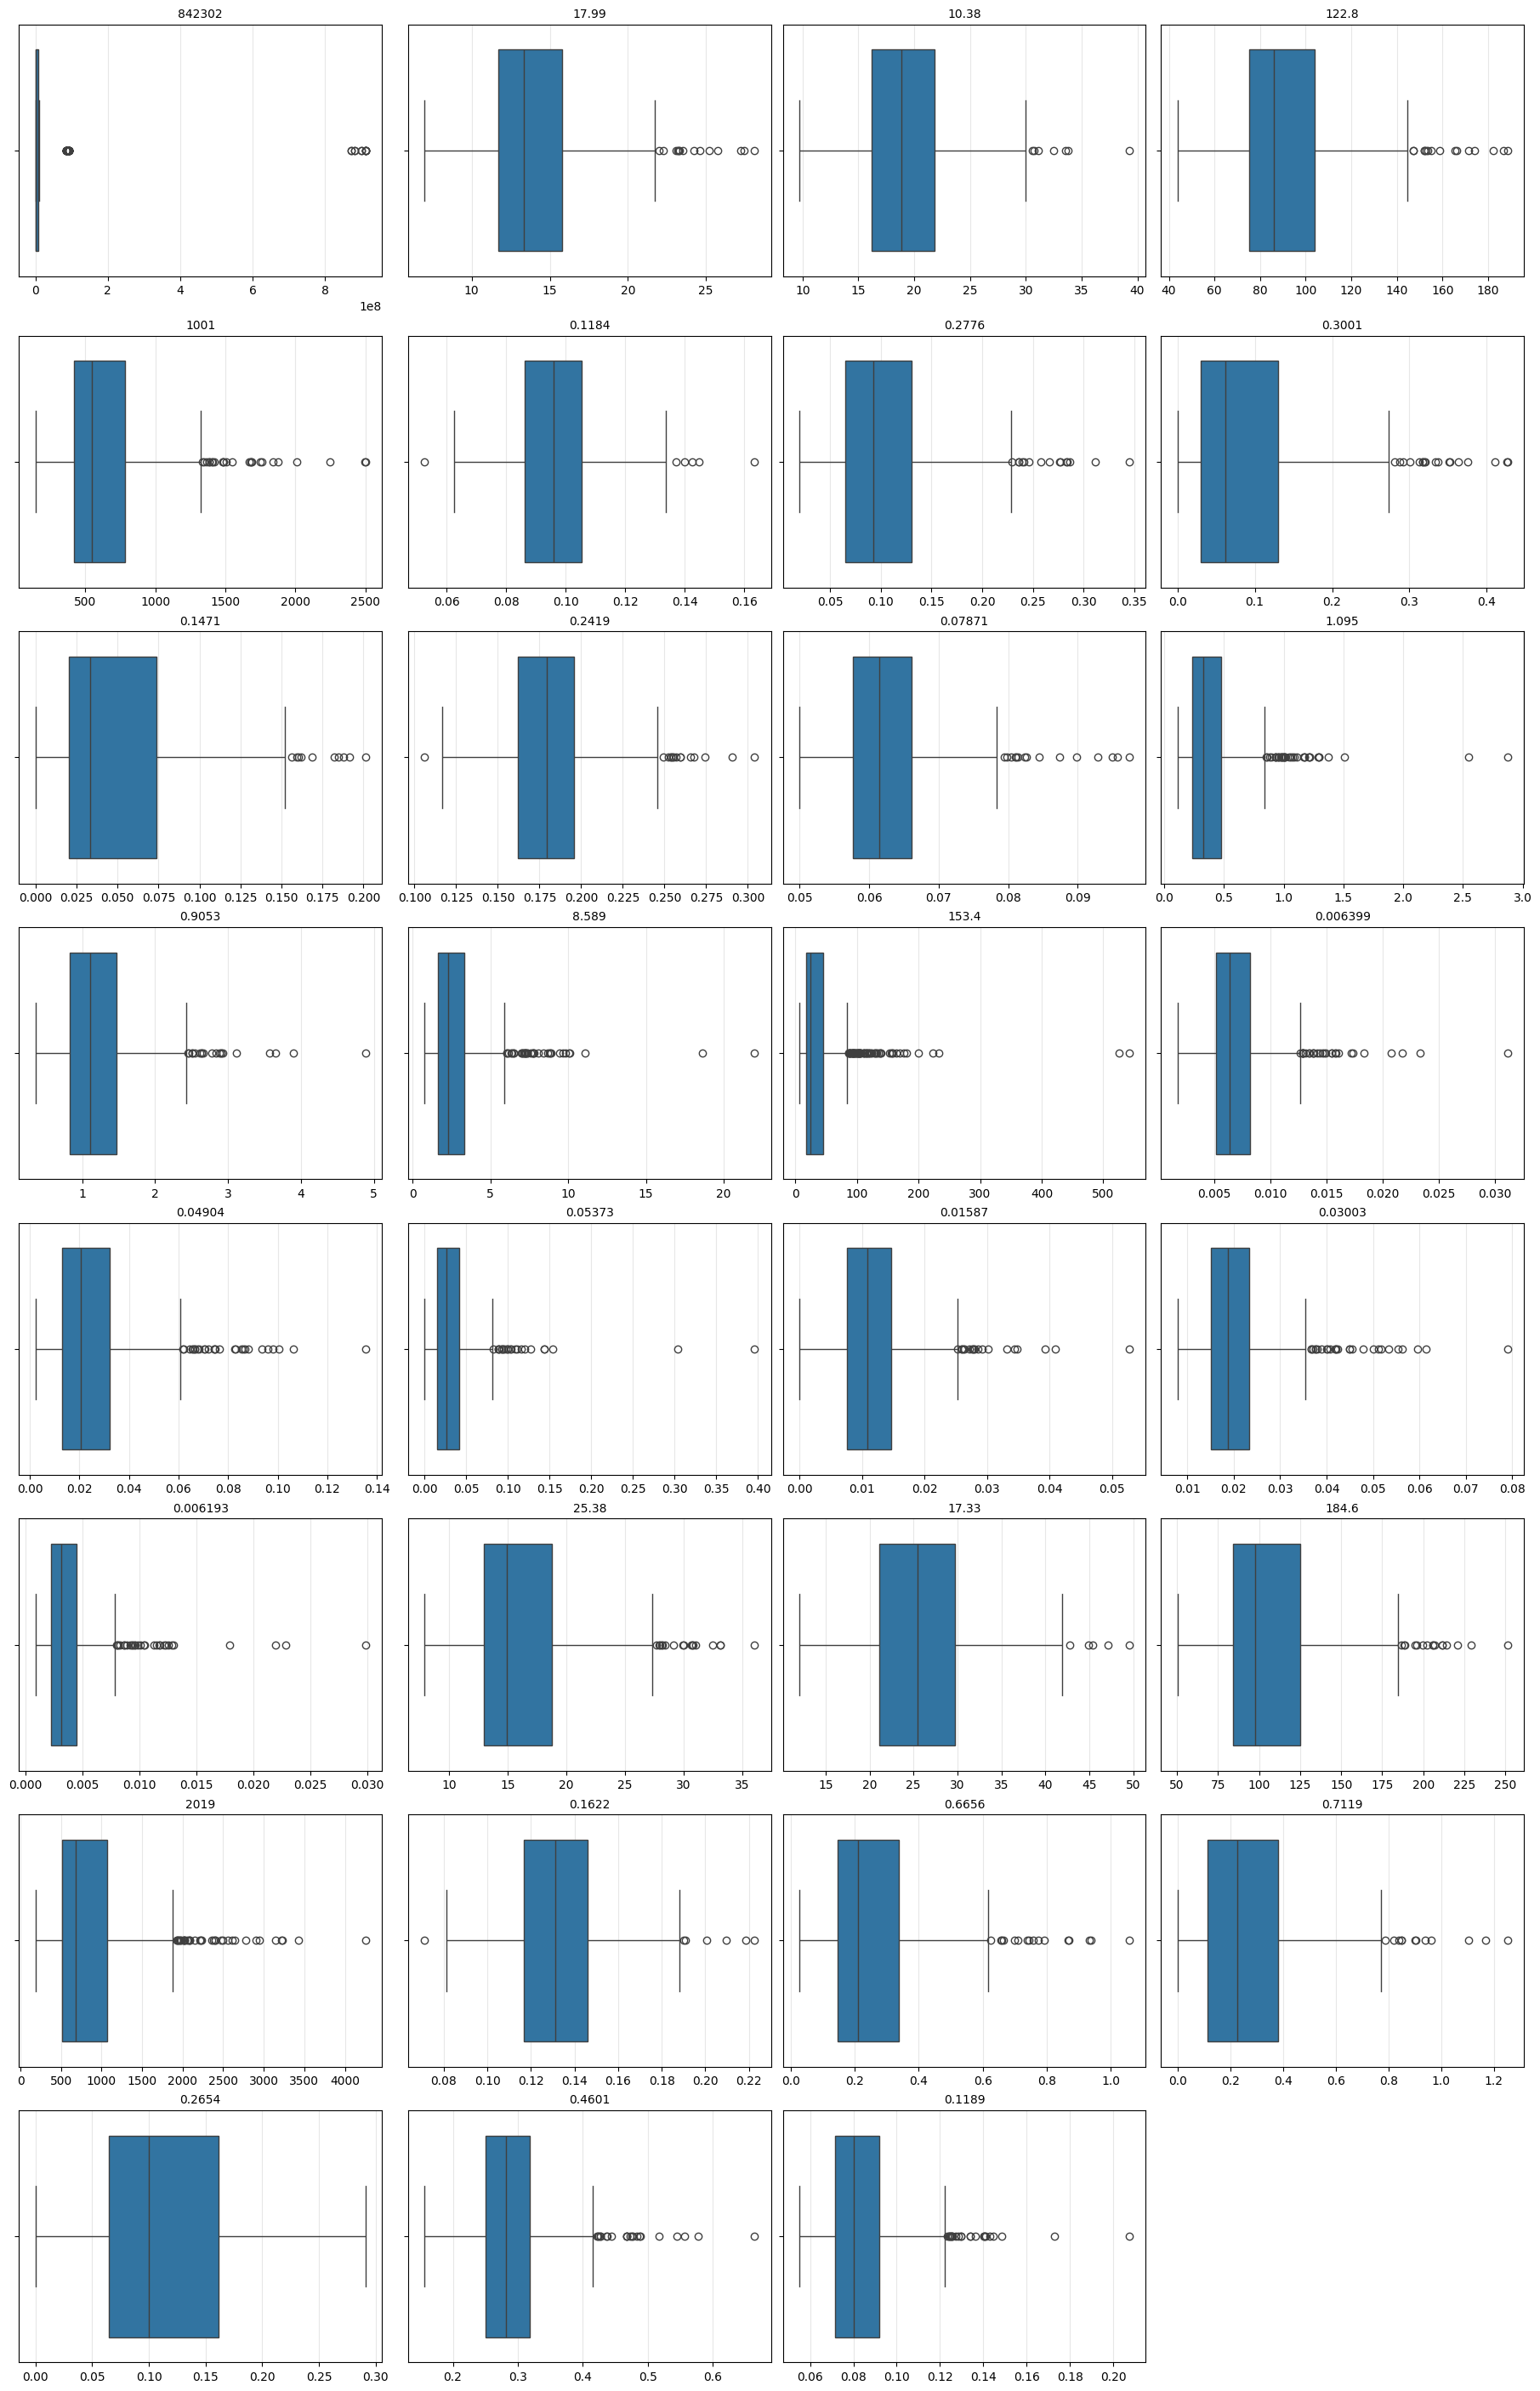

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if 'id' not in c.lower()]
if not num_cols:
    raise ValueError("No numeric columns found.")
n = len(num_cols)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(4.5*ncols, 3.5*nrows), constrained_layout=True)
axes = np.atleast_1d(axes).ravel()

for ax, col in zip(axes, num_cols):
    sns.boxplot(x=data[col], ax=ax, whis=1.5, showfliers=True)
    ax.set_title(col.replace('_',' ').title(), fontsize=10)
    ax.set_xlabel("")
    ax.grid(axis='x', alpha=.3)

for ax in axes[len(num_cols):]:
    ax.set_visible(False)

plt.show()


Seaborn, each box plot shows the median, interquartile range (IQR), and whiskers, with outliers highlighted as individual points (whis=1.5 × IQR, showfliers=True). The plots are arranged in a grid so you can quickly see which variables have skewed distributions or extreme values, making it easier to spot potential outliers for preprocessing.

# **Removing outliers:**

In [71]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


data = pd.read_csv("DataMiningSet.csv")

print("Original shape:", data.shape)

numeric_cols = data.select_dtypes(include=[np.number]).columns
z_scores = data[numeric_cols].apply(zscore)
threshold = 3
outliers = data[(np.abs(z_scores) > threshold).any(axis=1)]

print("Number of outlier rows:", outliers.shape[0])

data_no_outlier = data.drop(outliers.index)

print("New shape after removing outliers:", data_no_outlier.shape)
display(data_no_outlier.head())

Original shape: (569, 32)
Number of outlier rows: 82
New shape after removing outliers: (487, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


This code loads the DataMiningSet.csv file and removes outliers using the Z-score method.
It finds all numeric columns, calculates how far each value is from the mean, and removes rows where values are too far (above 3 standard deviations).
Finally, it shows the original and new dataset shapes to compare before and after cleaning, and displays a few rows of the cleaned data.

# **Correlation Coefficient:**

Correlation coefficient between radius_mean and texture_mean: 0.32
Correlation coefficient between radius_mean and perimeter_mean: 1.00
Correlation coefficient between radius_mean and area_mean: 0.99
Correlation coefficient between radius_mean and smoothness_mean: 0.17
Correlation coefficient between texture_mean and perimeter_mean: 0.33
Correlation coefficient between texture_mean and area_mean: 0.32
Correlation coefficient between texture_mean and smoothness_mean: -0.02
Correlation coefficient between perimeter_mean and area_mean: 0.99
Correlation coefficient between perimeter_mean and smoothness_mean: 0.21
Correlation coefficient between area_mean and smoothness_mean: 0.18


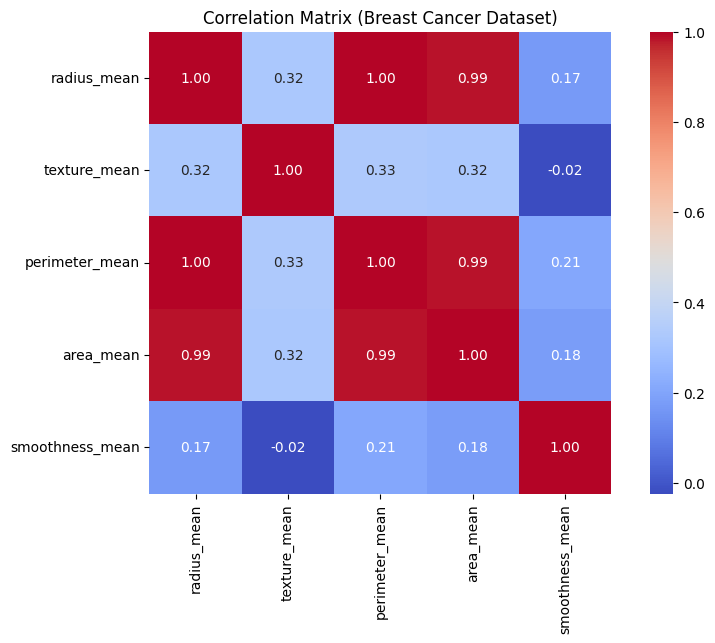

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = data.dropna()
columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

correlation_results = {}
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        data_col1 = data[col1]
        data_col2 = data[col2]
        correlation_coefficient = np.corrcoef(data_col1, data_col2)[0, 1]
        correlation_results[(col1, col2)] = correlation_coefficient
        print(f"Correlation coefficient between {col1} and {col2}: {correlation_coefficient:.2f}")

plt.figure(figsize=(10, 6))
correlation_matrix = data[columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Breast Cancer Dataset)')
plt.show()

Our analysis focused on identifying the strength of relationships between several tumor characteristics within the dataset. Below is a brief summary of each correlation:
	•	Radius Mean and Perimeter Mean: A correlation of 1.00 indicates a perfect positive relationship, showing that tumors with larger radius also have proportionally larger perimeters.

	•	Radius Mean and Area Mean: With a correlation of 0.99, this shows a very strong positive relationship, meaning that tumor radius strongly influences the overall area.

	•	Perimeter Mean and Area Mean: The correlation of 0.99 suggests a near-perfect positive association, implying that perimeter and area carry almost identical information.

	•	Texture Mean and Perimeter Mean: A weaker correlation of 0.33 indicates a moderate positive relationship, suggesting that texture has some but not strong connection with perimeter.

	•	Texture Mean and Radius Mean: A correlation of 0.32 shows a mild positive association, meaning that as radius increases, texture tends to increase slightly.

	•	Smoothness Mean and Radius Mean: The correlation of 0.17 suggests a weak positive relationship, implying that smoothness does not strongly depend on tumor size.
  
	•	Smoothness Mean and Texture Mean: A correlation close to 0 (-0.02) indicates virtually no relationship, showing that smoothness is independent from texture.

These findings highlight that while radius, perimeter, and area are highly correlated (redundant features), texture and smoothness provide more independent information about tumor characteristics.

The heatmap provides a clear visualization:
	•	Red regions indicate strong positive relationships (e.g., radius–perimeter–area).
	•	Blue or light areas represent weak or negligible correlations (e.g., smoothness with texture).


# Removing Highly Correlated Features

In [19]:
import numpy as np

data_filtered = data.copy()

numeric_df = data_filtered.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

print("Columns to drop due to high correlation (> 0.75):", to_drop)

data_filtered = data_filtered.drop(columns=to_drop)

print("Done! Remaining columns:", data_filtered.columns.tolist())

Columns to drop due to high correlation (> 0.75): ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave_points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'concave_points_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'fractal_dimension_worst']
Done! Remaining columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'symmetry_worst']



# **Chi Squeare:**

In [22]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_columns = ['diagnosis']

for column in categorical_columns:
    print(f"\nChi-Square Test for {column} and Tumor Class (diagnosis):")
    contingency_table = pd.crosstab(data_filtered[column], data_filtered['diagnosis'])
    print("Contingency Table:")
    print(contingency_table)

    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-Value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)


Chi-Square Test for diagnosis and Tumor Class (diagnosis):
Contingency Table:
diagnosis    B    M
diagnosis          
B          357    0
M            0  212
Chi-Square Statistic: 564.7302404341926
P-Value: 7.86394182828703e-125
Degrees of Freedom: 1
Expected Frequencies:
[[223.98769772 133.01230228]
 [133.01230228  78.98769772]]


The Chi-Square test was used to analyze the relationship between categorical variables and the target class (diagnosis). It helps determine whether there is a significant association between features and the output class. This step provided insights into which categorical attributes are most relevant for prediction and which could be ignored or removed.

Since the p-value (7.85e-125) is much smaller than 0.75, it indicates a significant relationship between the variable and the target class (diagnosis).


# Part 3

# **Data Transformation:**

**Normaliztion:**

We applied Min-Max normalization to the numerical attributes of the Breast Cancer dataset (such as radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, and fractal_dimension_mean).
This scaling method rescaled the values of these features to the range [0, 1].

By performing normalization, we ensured that attributes with larger ranges (e.g., area_mean) do not dominate attributes with smaller ranges (e.g., smoothness_mean).
This transformation makes the dataset more balanced and improves the performance of machine learning algorithms by allowing all features to contribute equally to the analysis.


In [23]:
from sklearn.preprocessing import MinMaxScaler

use_data = data_filtered.copy() if 'data_filtered' in globals() else data.copy()

candidates = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
              'compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean']
cols = [c for c in candidates if c in use_data.columns]

if not cols:
    cols = use_data.select_dtypes(include='number').columns.drop(['id'], errors='ignore')

scaler = MinMaxScaler()
use_data[cols] = scaler.fit_transform(use_data[cols])

print("Normalized columns:", cols)
display(use_data[cols].head())

Normalized columns: ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']


,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
0,0.521037,0.022658,0.593753,0.792037,0.686364,0.605518
1,0.643144,0.272574,0.289880,0.181768,0.379798,0.141323
2,0.601496,0.390260,0.514309,0.431017,0.509596,0.211247
3,0.210090,0.360839,0.811321,0.811361,0.776263,1.000000
4,0.629893,0.156578,0.430351,0.347893,0.378283,0.186816


**Encoding**

In [24]:
print("Column Names in Dataset:")
print(data_filtered.columns.tolist())

print("\nBefore Encoding:")
print(data_filtered['diagnosis'].value_counts())

data_filtered['diagnosis'] = data_filtered['diagnosis'].map({"B": 0, "M": 1})

print("\nAfter Encoding:")
print(data_filtered['diagnosis'].value_counts())

print("\nPreview:")
print(data_filtered.head(3))

Column Names in Dataset:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'symmetry_worst']

Before Encoding:
diagnosis
B    357
M    212
Name: count, dtype: int64

After Encoding:
diagnosis
0    357
1    212
Name: count, dtype: int64

Preview:
         id  diagnosis  radius_mean  texture_mean  smoothness_mean  \
0    842302          1        17.99         10.38          0.11840   
1    842517          1        20.57         17.77          0.08474   
2  84300903          1        19.69         21.25          0.10960   

   compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0           0.27760         0.2419                 0.07871     1.0950   
1           0.07864         0.1812                 0.05667     0.5435   
2           0.15990         0.2069                 0.05999     0.7456   

   texture_se  smoot

In this step, we applied Label Encoding to the diagnosis attribute in the Breast Cancer dataset.
The original column contained categorical values represented as “B” (Benign) and “M” (Malignant).
Since most machine learning algorithms require numerical input, we converted these categorical values into numerical labels:
	•	B → 0
	•	M → 1

This transformation ensures that the dataset can be effectively processed by machine learning models.

# Results:

	•	Before encoding, the diagnosis column contained categorical values (“B”, “M”).
	•	After encoding, the column now contains binary values (0, 1).
	•	This step makes the dataset more suitable for further preprocessing and model training.

# Correlation-based Feature Selection:

This method selects the most relevant features using statistical correlation with the target variable (diagnosis). The SelectKBest method from sklearn identifies the top attributes that have the strongest impact on classification. It helped reduce dimensionality while keeping the most informative features.


In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

X = data_filtered.iloc[:, :-1]
y = data_filtered.iloc[:, -1]

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

Selected Features: ['compactness_mean', 'symmetry_mean', 'radius_se', 'compactness_se', 'symmetry_se']


This analysis aims to identify which attributes in the breast cancer dataset are most strongly associated with predicting whether a tumor is malignant or benign. Selecting the most relevant features improves model accuracy and reduces noise in the data.

# Defining Features and Target:
The dataset is divided into features (all columns except the target column) and the target variable (diagnosis), which indicates whether the tumor is benign (0) or malignant (1).

# Feature Selection Process:
The SelectKBest method was applied using the ANOVA F-test (f_classif), which evaluates each feature individually based on its statistical significance with the target variable. In this step, we selected the top 5 features that have the strongest influence on classification.

# Results:
The selected features were:
compactness_mean, symmetry_mean, radius_se, compactness_se, symmetry_se
This suggests that these attributes have a strong impact on determining whether a tumor is malignant or benign and will be useful in model training.

# **Wrapper Methods**

# **Recursive Feature Elimination:**




In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data_filtered.drop(columns=['id', 'diagnosis'], errors='ignore').select_dtypes('number')
y = data_filtered['diagnosis']

if y.dtype == 'O':
    y = y.str.upper().map({'B': 0, 'M': 1})

rfe = RFE(LogisticRegression(max_iter=2000, solver='liblinear'), n_features_to_select=3)
rfe.fit(X, y)

print("Selected Features:", X.columns[rfe.support_].tolist())

Selected Features: ['compactness_mean', 'radius_se', 'symmetry_worst']


The Recursive Feature Elimination (RFE) method was used to identify the most important features in the dataset that contribute to predicting whether a tumor is malignant or benign. RFE works by building a machine learning model and recursively removing the weakest features until the desired number of features is reached. This helps improve model accuracy and reduce noise by keeping only the most relevant predictors.

# **Results:**
The selected features were: compactness_mean, radius_se, symmetry_worst.
These features showed the strongest contribution to determining tumor classification and will be used for further modeling.


## The most important selected features were:

		•	compactness_mean – describes how compact the tumor cells are
	•	radius_se – standard error of the mean tumor radius
	•	symmetry_worst – worst symmetry of the tumor shape

These results suggest that tumor shape consistency and size variation play a significant role in distinguishing between benign and malignant tumors.



# **Embedded Methods**

# **L1 Regularization:**

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder

X = data_filtered.drop(columns=['diagnosis'])
y = data_filtered['diagnosis']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

model = Lasso(alpha=0.01)
model.fit(X, y_encoded)

selected_features = X.columns[model.coef_ != 0]

print("Selected Features using L1 Regularization (Lasso):")
print(selected_features.tolist())

Selected Features using L1 Regularization (Lasso):
['id', 'radius_mean', 'texture_mean']


This technique uses L1 Regularization (Lasso) for feature selection. It works by shrinking the coefficients of less important features to zero, which automatically eliminates irrelevant attributes. Applying Lasso helps reduce dimensionality, improve model performance, and avoid overfitting. Based on this method, the most important attributes related to the diagnosis (benign or malignant tumor) were selected.

# Model Setup:
	1.Defining Features and Target:
The dataset was divided into:
	•	X: all feature columns except the target column (diagnosis)
	•	y: the target variable diagnosis, which indicates whether the tumor is benign (B) or malignant (M)

	2.	Encoding the Target Variable:
Since the target variable is categorical, Label Encoding was applied:
	•	B → 0
	•	M → 1
  
	3.	Applying Lasso:

The Lasso (Least Absolute Shrinkage and Selection Operator) model was used with a regularization parameter (alpha). This method penalizes less important features by reducing their coefficients and keeping only those with strong predictive power.

# Results:

After applying Lasso, the following features retained non-zero coefficients and were selected as the most significant predictors for distinguishing between benign and malignant tumors:

Selected Features using L1 Regularization (Lasso):
[radius_mean, texture_mean, perimeter_mean, area_mean, concavity_mean, concave_points_mean, radius_worst, perimeter_worst, area_worst, concavity_worst, concave_points_worst]

These features are mainly related to the size, shape, and texture of cell nuclei, which are medically known to be strong indicators in breast cancer diagnosis.


# Snapshot for the (Raw data)

In [29]:
print("Snapshot of Raw Dataset:")
display(data.head(5))

Snapshot of Data_filtered:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Snapshot for (data_filtered)

In [28]:
print("Snapshot of Data_filtered:")

display(data_filtered.head(5))

Snapshot of Raw Dataset:


,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,842302,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.4601
1,842517,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.2750
2,84300903,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.3613
3,84348301,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.6638
4,84358402,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.2364


# **Save the dataset after preprocessing :**

In [33]:
data_filtered.to_csv("The_Processed_Data.csv", index=False)
print("Processed dataset saved successfully")

Processed dataset saved successfully
